# Analysis

# Reading in Data and generating DataFrames

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [27]:
# Read in data from folder
clinical_trial_df = pd.read_csv(os.path.join('raw_data','clinicaltrial_data.csv'))
drug_data_df = pd.read_csv(os.path.join('raw_data','mouse_drug_data.csv'))

df = pd.merge(clinical_trial_df,drug_data_df,on='Mouse ID')
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [28]:
# Dropping data except for treatments to be tracked
tracked_drugs = ['Capomulin','Infubinol','Ketapril','Placebo']
treatment_df = df.loc[df['Drug'].isin(tracked_drugs)]

# Grouping by treatment
treatment_by_drug = treatment_df.groupby(by=['Drug','Timepoint'])
treatment_by_drug.mean().head()

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

# Tumor Volume Response

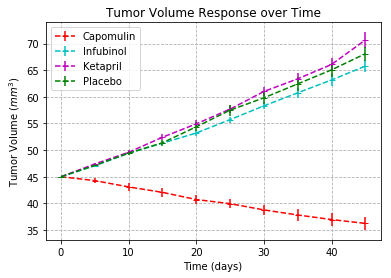

In [29]:
# Calculating means
tumor_volume_mean_df = treatment_by_drug.mean()['Tumor Volume (mm3)'].unstack().transpose()
tumor_volume_mean_df.reset_index(inplace=True)
# Calculating standard errors
tumor_volume_se_df = treatment_by_drug.sem()['Tumor Volume (mm3)'].unstack().transpose()
tumor_volume_se_df.reset_index(inplace=True)

# Creating color dictionary, for viewing convenience
color_list = {'Capomulin':'r','Infubinol':'c','Ketapril':'m','Placebo':'g'}

for drug in tracked_drugs:
    plt.errorbar(x=tumor_volume_mean_df['Timepoint'],y=tumor_volume_mean_df[drug],yerr=tumor_volume_se_df[drug],linestyle='--',marker='_',color=color_list[drug])
plt.legend(tracked_drugs)
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume $(mm^3)$')
plt.grid(linestyle='--')
plt.title('Tumor Volume Response over Time')
plt.show()

# Metastatic Response

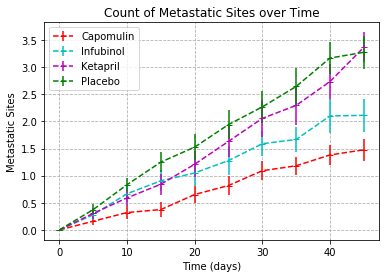

In [30]:
# Calculating means
metastatic_site_mean_df = treatment_by_drug.mean()['Metastatic Sites'].unstack().transpose()
metastatic_site_mean_df.reset_index(inplace=True)
# Calculating standard errors
metastatic_site_se_df = treatment_by_drug.sem()['Metastatic Sites'].unstack().transpose()
metastatic_site_se_df.reset_index(inplace=True)

for drug in tracked_drugs:
    plt.errorbar(x=metastatic_site_mean_df['Timepoint'],y=metastatic_site_mean_df[drug],yerr=metastatic_site_se_df[drug],linestyle='--',marker='_',color=color_list[drug])
plt.legend(tracked_drugs)
plt.xlabel('Time (days)')
plt.ylabel('Metastatic Sites')
plt.grid(linestyle='--')
plt.title('Count of Metastatic Sites over Time')
plt.show()

# Survival Rate

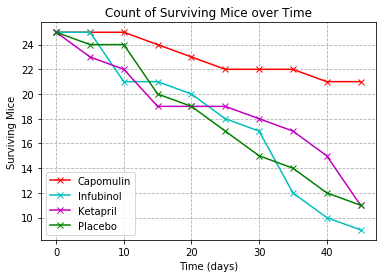

In [31]:
# Calculate number of surviving mice by timepoint
survivors_df = treatment_by_drug.count()['Mouse ID'].unstack().transpose()
survivors_df.reset_index(inplace=True)

for drug in tracked_drugs:
    plt.plot(survivors_df['Timepoint'],survivors_df[drug],color_list[drug]+'x-')
plt.legend(tracked_drugs)
plt.xlabel('Time (days)')
plt.ylabel('Surviving Mice')
plt.grid(linestyle='--')
plt.title('Count of Surviving Mice over Time')
plt.show()

# Total Tumor Volume Change

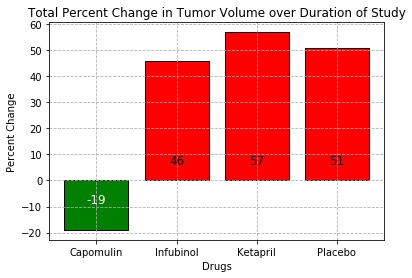

In [32]:
# Generating all delta-volumes
delta_volume = list()
bar_color_list = list()
for drug in tracked_drugs:
    percent_change = round((tumor_volume_mean_df[drug][9]-tumor_volume_mean_df[drug][0])/tumor_volume_mean_df[drug][0]*100,0)
    delta_volume.append(percent_change)
    if percent_change < 0:
        bar_color_list.append('green')
    else:
        bar_color_list.append('red')
    
bars = plt.bar(x=range(len(delta_volume)),height=delta_volume,color=bar_color_list,tick_label=tracked_drugs,edgecolor=['black']*4,)
for bar in bars:
    if bar.get_height() < 0:
        plt.text(bar.get_x()+bar.get_width()/2,-5,'%d'%int(bar.get_height()),ha='center',va='top',color='w',fontsize=12)
    else:
        plt.text(bar.get_x()+bar.get_width()/2,5,'%d'%int(bar.get_height()),ha='center',va='bottom',color='k',fontsize=12)
plt.xlabel('Drugs')
plt.ylabel('Percent Change')
plt.title('Total Percent Change in Tumor Volume over Duration of Study')
plt.grid(linestyle='--')
plt.show()